In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from IPython.display import display, clear_output 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import time
%matplotlib inline

In [3]:
train = pd.read_csv("../p_final/training.csv")
test = pd.read_csv("../p_final/test.csv")
sample = pd.read_csv("../p_final/SampleSubmission.csv")
ID = pd.read_csv("../p_final/IdLookupTable.csv")

In [4]:
print(train.head())

   left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1       

In [6]:
train_data = train['Image']
print(len(train_data))
# print(train_data[0])
train_data_samp = np.asarray([int(n) for n in train_data[1].split()])
print(train_data_samp)
test_data = test['Image']
print(len(train_data_samp))
print(len(train_data_samp) / 96)

7049
[219 215 204 ...,   1   1   1]
9216
96.0


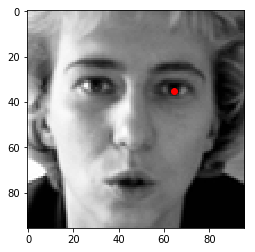

In [7]:
## rescale training data to 0,1 scale
train_data_samp = train_data_samp / 255.0

plt.figure(figsize=(4,4))
p = plt.subplot(1, 1, 1)

img = train_data_samp.reshape(96,96)
p.imshow(img, cmap='gray')
p.scatter(train['left_eye_center_x'][1], train['left_eye_center_y'][1], c='red', marker='o')
# p.annotate('left eye center', xy=(train['left_eye_center_x'][0], train['left_eye_center_y'][0]), 
#           xytext=(train['left_eye_center_x'][0] + 1, train['left_eye_center_y'][0] + 1),
#            arrowprops=dict(facecolor='red', shrink=0.05),          )

In [8]:
print(sample.head())

   RowId  Location
0      1         0
1      2         0
2      3         0
3      4         0
4      5         0


In [9]:
print(ID)

       RowId  ImageId                FeatureName  Location
0          1        1          left_eye_center_x       NaN
1          2        1          left_eye_center_y       NaN
2          3        1         right_eye_center_x       NaN
3          4        1         right_eye_center_y       NaN
4          5        1    left_eye_inner_corner_x       NaN
5          6        1    left_eye_inner_corner_y       NaN
6          7        1    left_eye_outer_corner_x       NaN
7          8        1    left_eye_outer_corner_y       NaN
8          9        1   right_eye_inner_corner_x       NaN
9         10        1   right_eye_inner_corner_y       NaN
10        11        1   right_eye_outer_corner_x       NaN
11        12        1   right_eye_outer_corner_y       NaN
12        13        1   left_eyebrow_inner_end_x       NaN
13        14        1   left_eyebrow_inner_end_y       NaN
14        15        1   left_eyebrow_outer_end_x       NaN
15        16        1   left_eyebrow_outer_end_y       N

In [42]:
# initiate lists for submission file
list_row_IDs = []
list_location = []
# create an average value for the initial guess of the location of each facial feature
average_guess = (len(train_data_samp) / 96)/2
# store row ID and average guess to each
for i in range(len(ID)):
    list_row_IDs.append(ID['RowId'][i])
    list_location.append(average_guess)

# create a pandas dataframe for the initial file submission
data = {'RowId': list_row_IDs, 'Location': list_location}
initial_submission = pd.DataFrame(data = data, columns = ['RowId', 'Location'])

initial_submission.to_csv('initial_submission.csv', index=False)

In [11]:
## Formatting Training Data (i.e. images)
print(type(train_data))
X = train_data
for i in range(len(X)):
    X[i] = np.asarray([int(n) for n in X[i].split()])

<class 'pandas.core.series.Series'>


/Users/Gutwein/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [15]:
## normalize
X / 255

0       [0.933333333333, 0.925490196078, 0.92941176470...
1       [0.858823529412, 0.843137254902, 0.8, 0.768627...
2       [0.564705882353, 0.556862745098, 0.62352941176...
3       [0.756862745098, 0.752941176471, 0.75686274509...
4       [0.576470588235, 0.580392156863, 0.62745098039...
5       [0.654901960784, 0.662745098039, 0.66666666666...
6       [0.427450980392, 0.427450980392, 0.49019607843...
7       [0.698039215686, 0.694117647059, 0.69803921568...
8       [0.643137254902, 0.619607843137, 0.46274509803...
9       [0.886274509804, 0.890196078431, 0.88235294117...
10      [0.203921568627, 0.2, 0.211764705882, 0.223529...
11      [0.556862745098, 0.486274509804, 0.48235294117...
12      [0.337254901961, 0.364705882353, 0.41568627451...
13      [0.294117647059, 0.254901960784, 0.24705882352...
14      [0.466666666667, 0.41568627451, 0.396078431373...
15      [0.203921568627, 0.211764705882, 0.29019607843...
16      [0.788235294118, 0.78431372549, 0.792156862745...
17      [0.792

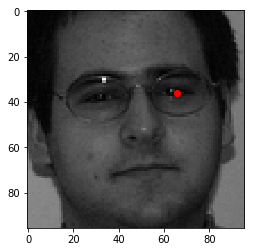

In [19]:
## testing for random picture
plt.figure(figsize=(4,4))
p = plt.subplot(1, 1, 1)

img = X[6122].reshape(96,96)
p.imshow(img, cmap='gray')
p.scatter(train['left_eye_center_x'][6122], train['left_eye_center_y'][6122], c='red', marker='o')

In [30]:
## Now we format training labels
##
## 30 labels total
## we want them to be in order of submittal file
##
## Creating a matrix of n_samples (7049) X n_labels (30)
Y = np.zeros((7049,30))
labels = train.columns.tolist()[0:30] ## should give us the column labels

for i in range(7049):
    for idx, col in enumerate(labels):
        Y[i][idx] = train[col][i]

#print(Y[4][29] == train['mouth_center_bottom_lip_y'][4])

In [34]:
print(train.columns.tolist()[0:30])
print(type(Y))
print(Y.shape)

['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y']
<class 'numpy.ndarray'>
(7049, 30)


In [31]:
from sklearn.neural_network import MLPClassifier

In [35]:
## splitting training data
x_sub_train = X[:4000]
x_sub_dev = X[4000:]
y_sub_train = Y[:4000]
y_sub_dev = Y[4000:]

mod_baseline = MLPClassifier()
mod_baseline.fit(x_sub_train, y_sub_train)

ValueError: setting an array element with a sequence.